In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy

In [2]:
df=pd.read_csv('Student_scores.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,Unknown,bachelor's degree,standard,none,71,71,74
1,1,female,group C,some college,standard,No,69,90,88
2,2,female,group B,master's degree,standard,none,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,45,56,42
4,4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(30641, 9)

In [5]:
df.isna().sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Unnamed: 0       int64
Gender          object
EthnicGroup     object
ParentEduc      object
LunchType       object
TestPrep        object
MathScore        int64
ReadingScore     int64
WritingScore     int64
dtype: object

In [8]:
df.memory_usage()

Index              128
Unnamed: 0      245128
Gender          245128
EthnicGroup     245128
ParentEduc      245128
LunchType       245128
TestPrep        245128
MathScore       245128
ReadingScore    245128
WritingScore    245128
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [10]:
df.rename(columns={'Unnamed: 0':'no_name'},inplace=True)

In [11]:
df.columns

Index(['no_name', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [12]:
df.describe()

,no_name,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.558402,69.377533,68.418622
std,288.747894,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,249.000000,56.000000,59.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


In [13]:
df['Gender'].value_counts()

female    15424
male      15217
Name: Gender, dtype: int64

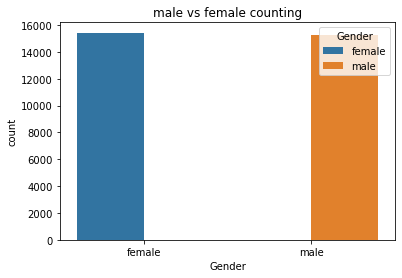

In [14]:
sns.countplot(x='Gender',data=df,hue='Gender')
plt.title('male vs female counting')
plt.show()

In [15]:
df['EthnicGroup'].value_counts()

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Unknown    1840
Name: EthnicGroup, dtype: int64

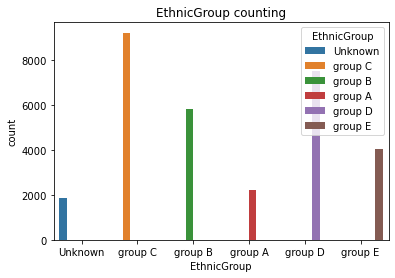

In [16]:
sns.countplot(x='EthnicGroup',data=df,hue='EthnicGroup')
plt.title('EthnicGroup counting')
plt.show()

In [17]:
df['ParentEduc'].value_counts()

some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Unknown               1845
Name: ParentEduc, dtype: int64

## Note:-Making an assumption that "some college" is equal to "bachelor's degree" and "high school" is equal to "some high school"

In [18]:
df['ParentEduc']=df['ParentEduc'].replace('some high school','high school')

In [19]:
df['ParentEduc']=df['ParentEduc'].replace('some college',"bachelor's degree")

In [20]:
df['ParentEduc'].value_counts()

high school           11204
bachelor's degree     10019
associate's degree     5550
master's degree        2023
Unknown                1845
Name: ParentEduc, dtype: int64

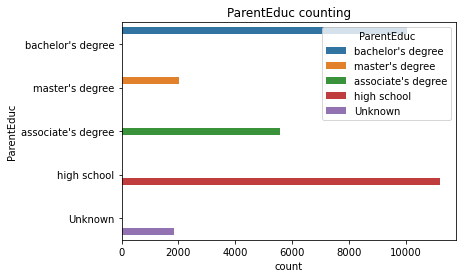

In [21]:
sns.countplot(y='ParentEduc',data=df,hue='ParentEduc')
plt.title('ParentEduc counting')
plt.show()

In [22]:
df['LunchType'].value_counts()

standard        19905
free/reduced    10736
Name: LunchType, dtype: int64

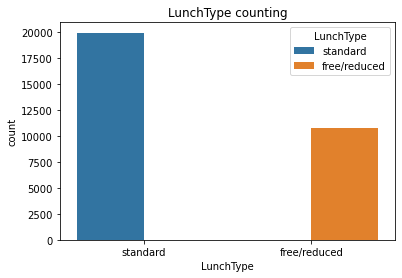

In [23]:
sns.countplot(x='LunchType',data=df,hue='LunchType')
plt.title('LunchType counting')
plt.show()

In [24]:
df['TestPrep'].value_counts()

none         18856
completed     9955
No            1830
Name: TestPrep, dtype: int64

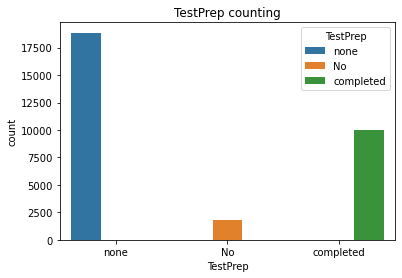

In [25]:
sns.countplot(x='TestPrep',data=df,hue='TestPrep')
plt.title('TestPrep counting')
plt.show()

(array([7.000e+00, 4.100e+01, 2.340e+02, 1.014e+03, 2.940e+03, 5.629e+03,
        7.395e+03, 6.923e+03, 4.366e+03, 2.092e+03]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

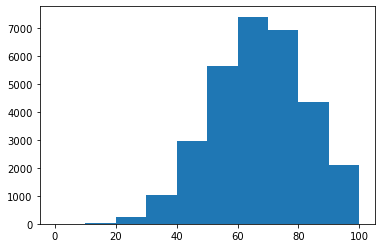

In [26]:
plt.hist(df['MathScore'])

(array([  21.,   69.,  361., 1278., 3186., 5680., 6913., 6365., 4372.,
        2396.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

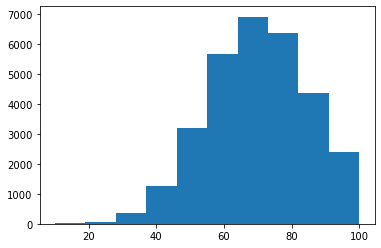

In [27]:
plt.hist(df['ReadingScore'])

(array([7.000e+00, 6.300e+01, 2.600e+02, 1.201e+03, 2.802e+03, 5.709e+03,
        7.411e+03, 6.250e+03, 4.463e+03, 2.475e+03]),
 array([  4. ,  13.6,  23.2,  32.8,  42.4,  52. ,  61.6,  71.2,  80.8,
         90.4, 100. ]),
 <BarContainer object of 10 artists>)

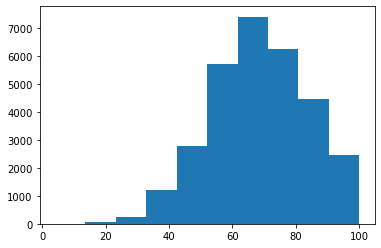

In [28]:
plt.hist(df['WritingScore'])

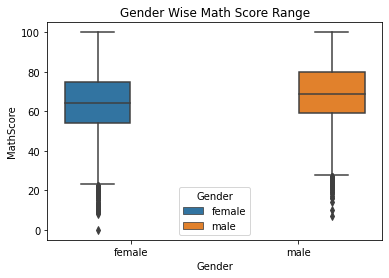

In [29]:
sns.boxplot(x='Gender',y='MathScore',data=df,hue='Gender')
plt.title('Gender Wise Math Score Range')
plt.show()

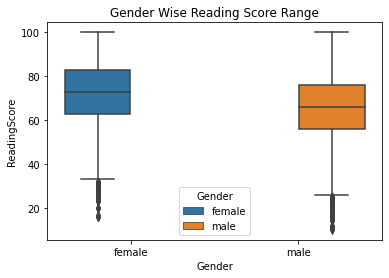

In [30]:
sns.boxplot(x='Gender',y='ReadingScore',data=df,hue='Gender')
plt.title('Gender Wise Reading Score Range')
plt.show()

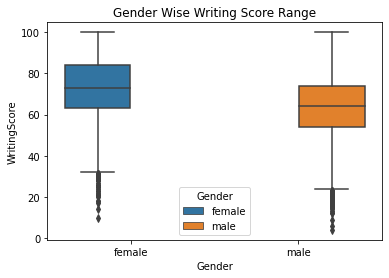

In [31]:
sns.boxplot(x='Gender',y='WritingScore',data=df,hue='Gender')
plt.title('Gender Wise Writing Score Range')
plt.show()

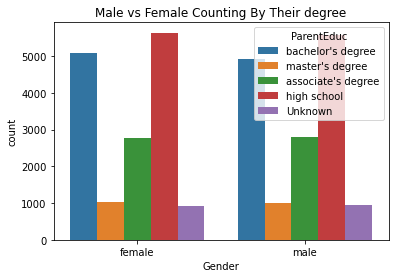

In [32]:
sns.countplot(x='Gender',hue='ParentEduc',data=df)
plt.title('Male vs Female Counting By Their degree')
plt.show()

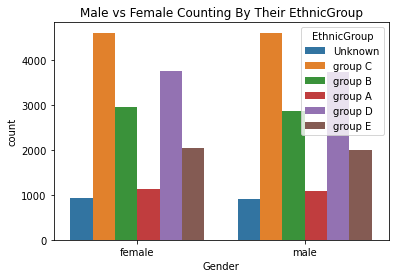

In [33]:
sns.countplot(x='Gender',hue='EthnicGroup',data=df)
plt.title('Male vs Female Counting By Their EthnicGroup')
plt.show()

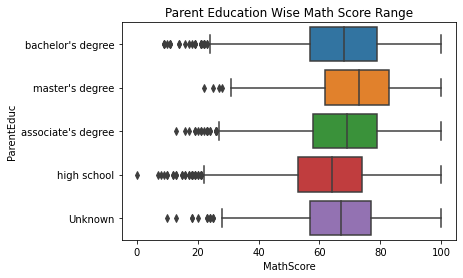

In [34]:
sns.boxplot(y='ParentEduc',x='MathScore',data=df)
plt.title('Parent Education Wise Math Score Range')
plt.show()

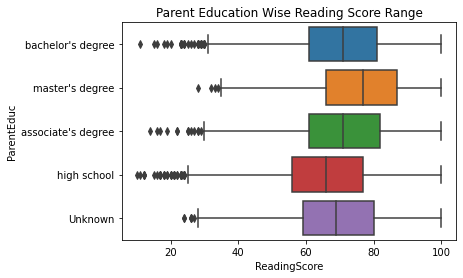

In [35]:
sns.boxplot(y='ParentEduc',x='ReadingScore',data=df)
plt.title('Parent Education Wise Reading Score Range')
plt.show()

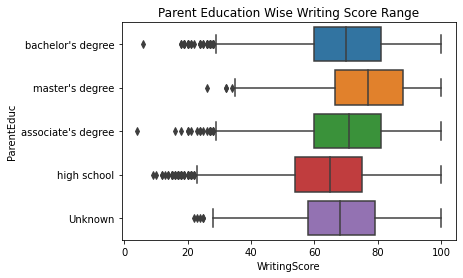

In [36]:
sns.boxplot(y='ParentEduc',x='WritingScore',data=df)
plt.title('Parent Education Wise Writing Score Range')
plt.show()

In [37]:
df['percentage']=((df['MathScore']+df['ReadingScore']+df['WritingScore'])/300)*100

In [38]:
df.head()

,no_name,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,percentage
0,0,female,Unknown,bachelor's degree,standard,none,71,71,74,72.000000
1,1,female,group C,bachelor's degree,standard,No,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,87,93,91,90.333333
3,3,male,group A,associate's degree,free/reduced,none,45,56,42,47.666667
4,4,male,group C,bachelor's degree,standard,none,76,78,75,76.333333


In [39]:
def grade(x):
    if x>=90.0:
        return "A"
    elif x>=80.0 and x<90.0:
        return "B"
    elif x>=70.0 and x<80.0:
        return "C"
    elif x>=60.0 and x<70.0:
        return "D"
    elif x>=50.0 and x<60.0:
        return "E"
    elif x>=40.0 and x<50.0:
        return "F"
    elif x>=30.0 and x<40.0:
        return "G"
    else:
        return "Fail"

In [40]:
df['grade_math']=df['MathScore'].apply(grade)

In [41]:
df['grade_writing']=df['WritingScore'].apply(grade)

In [42]:
df['grade_reading']=df['ReadingScore'].apply(grade)

In [43]:
df['grade']=df['percentage'].apply(grade)

In [44]:
df.head()

,no_name,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,percentage,grade_math,grade_writing,grade_reading,grade
0,0,female,Unknown,bachelor's degree,standard,none,71,71,74,72.000000,C,C,C,C
1,1,female,group C,bachelor's degree,standard,No,69,90,88,82.333333,D,B,A,B
2,2,female,group B,master's degree,standard,none,87,93,91,90.333333,B,A,A,A
3,3,male,group A,associate's degree,free/reduced,none,45,56,42,47.666667,F,F,E,F
4,4,male,group C,bachelor's degree,standard,none,76,78,75,76.333333,C,C,C,C


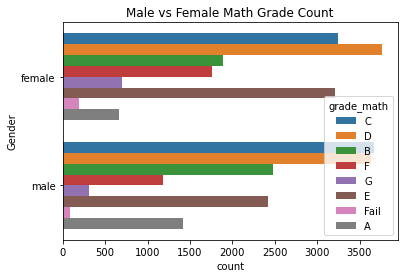

In [45]:
sns.countplot(y='Gender',hue='grade_math',data=df)
plt.title('Male vs Female Math Grade Count')
plt.show()

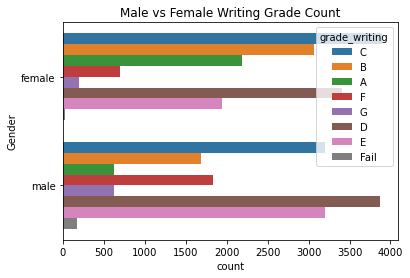

In [46]:
sns.countplot(y='Gender',hue='grade_writing',data=df)
plt.title('Male vs Female Writing Grade Count')
plt.show()

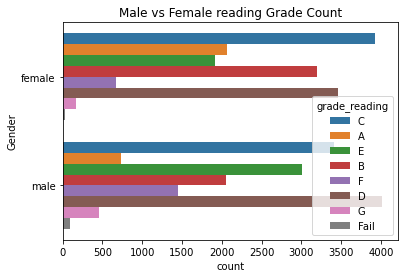

In [47]:
sns.countplot(y='Gender',hue='grade_reading',data=df)
plt.title('Male vs Female reading Grade Count')
plt.show()

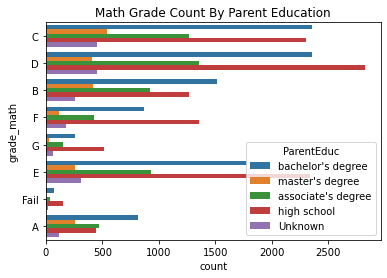

In [48]:
sns.countplot(y='grade_math',hue='ParentEduc',data=df)
plt.title('Math Grade Count By Parent Education')
plt.show()

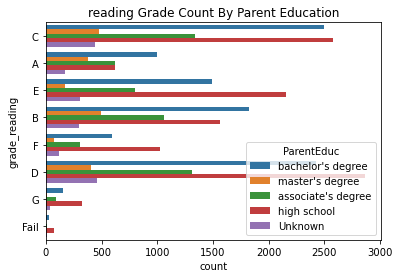

In [49]:
sns.countplot(y='grade_reading',hue='ParentEduc',data=df)
plt.title('reading Grade Count By Parent Education')
plt.show()

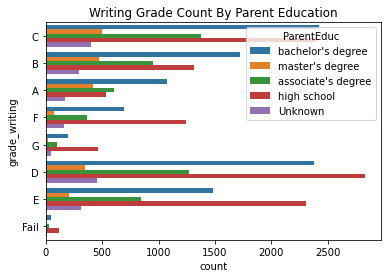

In [50]:
sns.countplot(y='grade_writing',hue='ParentEduc',data=df)
plt.title('Writing Grade Count By Parent Education')
plt.show()

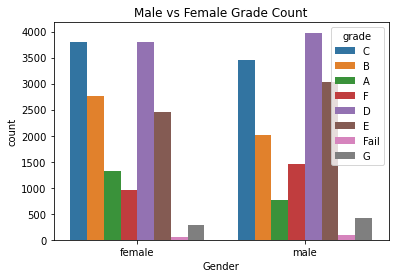

In [51]:
sns.countplot(x='Gender',hue='grade',data=df)
plt.title('Male vs Female Grade Count')
plt.show()

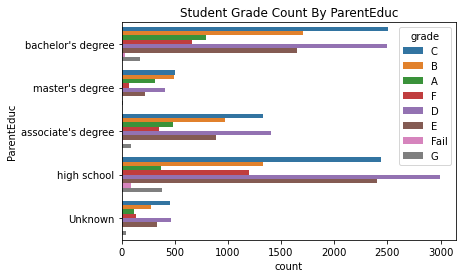

In [53]:
sns.countplot(y='ParentEduc',hue='grade',data=df)
plt.title('Student Grade Count By ParentEduc')
plt.show()